###**Summary**

* Import important libraries 
* Organize data into training, validation and test directories, only once!
* Transform images in format that the model expects, here Keras generator
* Plot some images with corresponding labels
* Build convolutional neural network 
* Checkout model info 
* Compile model to prepare it for training 
* Train the model 
***Save model as .tf file for further processing**
***Save model as pickle file for further processing**
***Convert saved model as .tflite format for app integration**
* Predict 
* Plot predictions in confusion matrix
***Load the model from Google Drive in order to continue training where stopped** 
* Data Augmentation for image generation






###**Import libraries**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import keras
from tensorflow.python.keras import layers
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.python.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

from keras.utils.vis_utils import plot_model
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.utils.generic_utils import NoopLoadingScope
from keras.models import load_model
from keras.preprocessing import image
from tensorflow.keras.utils import img_to_array
import tensorflow_datasets as tfds
import cv2
import numpy as np

###**Connect to Google Drive**

In [ ]:
# Connect to Google Drive
# More information see https://towardsdatascience.com/different-ways-to-connect-google-drive-to-a-google-colab-notebook-pt-1-de03433d2f7a
# /content is the root folder of Google Colab and has to be appended to all paths used in the notebook
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls '/content/drive/My Drive/IUI/Drunkometer/dataset/both/'


normal_103.jpg	normal_268.jpg	normal_427.jpg	normal_561.jpg	normal_717.jpg
normal_107.jpg	normal_277.jpg	normal_428.jpg	normal_570.jpg	normal_71.jpg
normal_109.jpg	normal_278.jpg	normal_42.jpg	normal_574.jpg	normal_720.jpg
normal_110.jpg	normal_280.jpg	normal_431.jpg	normal_575.jpg	normal_721.jpg
normal_112.jpg	normal_283.jpg	normal_432.jpg	normal_579.jpg	normal_722.jpg
normal_114.jpg	normal_284.jpg	normal_434.jpg	normal_581.jpg	normal_725.jpg
normal_11.jpg	normal_286.jpg	normal_436.jpg	normal_585.jpg	normal_728.jpg
normal_120.jpg	normal_287.jpg	normal_439.jpg	normal_587.jpg	normal_729.jpg
normal_122.jpg	normal_288.jpg	normal_441.jpg	normal_588.jpg	normal_731.jpg
normal_124.jpg	normal_291.jpg	normal_442.jpg	normal_589.jpg	normal_732.jpg
normal_126.jpg	normal_292.jpg	normal_446.jpg	normal_58.jpg	normal_737.jpg
normal_127.jpg	normal_293.jpg	normal_447.jpg	normal_591.jpg	normal_741.jpg
normal_12.jpg	normal_297.jpg	normal_449.jpg	normal_596.jpg	normal_742.jpg
normal_132.jpg	normal_29.jpg	n

In [ ]:
%cd /content/drive/MyDrive/IUI/Drunkometer/dataset/both/

/content/drive/MyDrive/IUI/Drunkometer/dataset/both


###**Organize data into training, validation, test directories**

In [ ]:
# Important: THIS ONLY NEEDS TO BE RUN ONCE IN ORDER TO ORGANIZE THE DATA!!!
# Dataset originally from: https://github.com/wuling31715/Drunk-Detect/tree/bfcfeed790a350c13f397595c4d02fda93182850 

# Organize data into training, validation, test directories
# Training set of 900 images
# Validation set of 140 images 
# Test set of 30 images 
# Each split evenly between drunk and normal 

!ls '/content/drive/My Drive/IUI/Drunkometer/dataset/both/'
#os.chdir('dataset/both')

if os.path.isdir('train/drunk') is False:
    os.makedirs('train/drunk')
    os.makedirs('train/normal')
    os.makedirs('valid/drunk')
    os.makedirs('valid/normal')
    os.makedirs('test/drunk')
    os.makedirs('test/normal')

    for i in random.sample(glob.glob('normal*'), 450):
        shutil.move(i, 'train/normal')      
    for i in random.sample(glob.glob('drunk*'), 450):
        shutil.move(i, 'train/drunk')
    for i in random.sample(glob.glob('normal*'), 70):
        shutil.move(i, 'valid/normal')        
    for i in random.sample(glob.glob('drunk*'), 70):
        shutil.move(i, 'valid/drunk')
    for i in random.sample(glob.glob('normal*'), 15):
        shutil.move(i, 'test/normal')      
    for i in random.sample(glob.glob('drunk*'), 15):
        shutil.move(i, 'test/drunk')

os.chdir('../../')

In [ ]:
train_path = '/content/drive/My Drive/IUI/Drunkometer/dataset/both/train'
valid_path = '/content/drive/My Drive/IUI/Drunkometer/dataset/both/valid'
test_path = '/content/drive/My Drive/IUI/Drunkometer/dataset/both/test'

In [ ]:
train_path_drunk = '/content/drive/My Drive/IUI/Drunkometer/dataset/both/train/drunk' 
dirListing = os.listdir(train_path_drunk)

print(len(dirListing))

450


###**Transform images in the format of a Keras generator because that is the format that the model expects**

In [ ]:
#Whenever we train a model we need to put the data that we train the model on in a format that the model expects.
#The Keras sequential model receives the data whenever the fit() function is called. 
#Thus: Transform images in the format of a Keras generator here. 

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['drunk', 'normal'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['drunk', 'normal'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['drunk', 'normal'], batch_size=10, shuffle=False)


Found 900 images belonging to 2 classes.
Found 140 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [ ]:
#Validate that we have found the images on disk 
assert train_batches.n == 900
assert valid_batches.n == 140
assert test_batches.n == 30
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 2

###**Plot some images with the corresponding labels**

In [ ]:
#Grab a single batch of images and the corresponding labels from our train batches, as our batch size is 10 this will be 10 images along with the corresponding labels.  
imgs, labels = next(train_batches)

In [ ]:
#Next use the def plotImages to plot the images that we just obtained.
#See more here: TensorFlow's documentation https://www.tensorflow.org/tutorials/images/classification#visualize_training_images
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

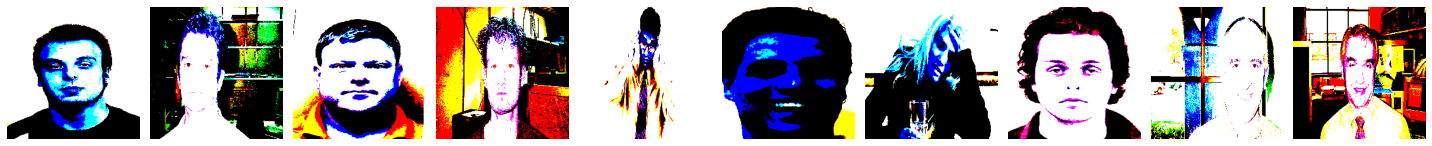

[[1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [ ]:
#Also print the corresponding labels to those images.
#1.0. is drunk, 0.1. is normal. 
plotImages(imgs)
print(labels)

###**Build the convolutional neural network**

In [ ]:
#After obtaining the image data, organizing it on disk and processing it
#we can finally build and train a CNN!!!

model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax')
])

###**Check all the information about the model and its learnable parameters etc.**

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 200704)            0         
                                                                 
 dense (Dense)               (None, 2)                 4

In [ ]:
#Check Deep Learning Fundamentals for more information about learnable parameters etc. 
#https://deeplizard.com/learn/playlist/PLZbbT5o_s2xq7LwI2y8_QtvuXZedL6tQU

###**Insert stopping points during training**

In [ ]:
checkpoint = ModelCheckpoint('Drunkmodelzwischensave.h5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)
# This will stop the execution early by checking the following properties
earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )
# Models often benefit from reducing the learning rate by a factor of 2–10 once learning stagnates                                              
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)
callbacks = [earlystop, checkpoint,reduce_lr]

###**Compile the model in order to prepare it for training**



In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

###**Train the model**

In [ ]:
# Could also be stored in variable if needed e.g. history = model.fit(...)
# Important: THIS ONLY NEEDS TO BE RUN IF WE WANT TO TRAIN FROM SCRATCH e.g. with new parameters for testing 
# In case we already trained (what we did) we can continue with the model.load() function further down

model.fit(x=train_batches,
    validation_data=valid_batches,
    #validation_steps=len(valid_batches),
    epochs=30,
    verbose=2
)

Epoch 1/30
90/90 - 127s - loss: 11.4486 - accuracy: 0.7622 - val_loss: 7.1910 - val_accuracy: 0.8143 - 127s/epoch - 1s/step
Epoch 2/30
90/90 - 74s - loss: 2.0054 - accuracy: 0.9189 - val_loss: 3.3052 - val_accuracy: 0.8571 - 74s/epoch - 826ms/step
Epoch 3/30
90/90 - 79s - loss: 0.4071 - accuracy: 0.9611 - val_loss: 1.4395 - val_accuracy: 0.9214 - 79s/epoch - 874ms/step
Epoch 4/30
90/90 - 74s - loss: 0.2575 - accuracy: 0.9756 - val_loss: 2.9821 - val_accuracy: 0.8714 - 74s/epoch - 828ms/step
Epoch 5/30
90/90 - 79s - loss: 0.1257 - accuracy: 0.9844 - val_loss: 0.8387 - val_accuracy: 0.9643 - 79s/epoch - 875ms/step
Epoch 6/30
90/90 - 74s - loss: 0.3538 - accuracy: 0.9722 - val_loss: 1.0605 - val_accuracy: 0.9500 - 74s/epoch - 824ms/step
Epoch 7/30
90/90 - 78s - loss: 0.0580 - accuracy: 0.9967 - val_loss: 1.5357 - val_accuracy: 0.9286 - 78s/epoch - 868ms/step
Epoch 8/30
90/90 - 74s - loss: 7.3928e-04 - accuracy: 1.0000 - val_loss: 1.1067 - val_accuracy: 0.9357 - 74s/epoch - 821ms/step
Epoc

###**Save model as .tf file for further processing**

In [ ]:
# Save the model in Google Drive 
# Use the model.save() method pass a path to the directory you want to save the model into
# Saving the model in tensorflow format because the .h5 format will not save optimizer status and any custom_loss defined
# That is why the .tf format is better suitable for retraining the from where we left
# See more here: https://stackoverflow.com/questions/51854463/is-it-possible-to-retrain-a-previously-saved-keras-model
# And here: https://stackoverflow.com/questions/42666046/loading-a-trained-keras-model-and-continue-training 

model.save('/content/drive/My Drive/IUI/Drunkometer/Drunkmodel_tf', save_format='tf')

In [ ]:
# Save the model in Google Drive in .h5 format also, just in case 

model.save('/content/drive/My Drive/IUI/Drunkometer/Drunkmodel.h5')

###**Save model as pickle file for further processing**


In [ ]:
# from: https://practicaldatascience.co.uk/machine-learning/how-to-save-and-load-machine-learning-models-using-pickle#:~:text=Save%20the%20model%20with%20Pickle,pkl%20.
import pandas as pd
import pickle
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

In [ ]:
# save model
pickle.dump(model, open('model.pkl', 'wb'))

In [ ]:
# load model using pickle 
pickled_model = pickle.load(open('model.pkl', 'rb'))
pickled_model.predict(X_test)

###**Predict test images**

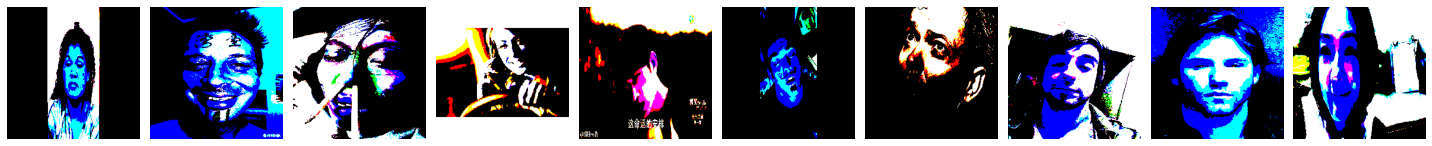

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [ ]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [ ]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [ ]:
np.round(predictions)


array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

###**Plot predictions in a confusion matrix**

In [ ]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))


In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
#Find out the right order for the labels 
test_batches.class_indices

{'drunk': 0, 'normal': 1}

Confusion matrix, without normalization
[[15  0]
 [ 1 14]]


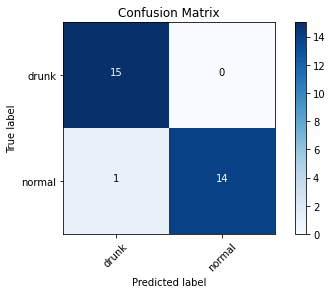

In [ ]:
#Plot the matrix with the right order for the labels 
cm_plot_labels = ['drunk','normal']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')


In [ ]:
# Looking from the top left to the bottom right we see that the model appears to have done well? 
# We have 2 classes with 15 samples each 
# And once it predicted 11 correctly and then 15 correctly 
# For the drunk 11 out of 15 were correct 
# For the normal 15 out of 15 were correct 
# Accuracy pretty well 

###**Load the model from Google Drive in order to continue training where stopped**

In [ ]:
# Saved  model as .h5 or .tf before 
# To train the model from where it stopped we have to load it again and do a model.fit again
# Important: Do not compile the model after loading it as this would reset the weights
# To load the model use the load_model() method on the models object 

from tensorflow.keras import models

pretrainedmodel = models.load_model('/content/drive/My Drive/IUI/Drunkometer/Dennis_Drunkmodel_tf')
pretrainedmodel.fit(x=train_batches,
    validation_data=valid_batches,
    #validation_steps=len(valid_batches),
    epochs=10,
    verbose=2
)

In [ ]:
# Load .h5 model
# pretrainedmodel = models.load_model('/content/drive/My Drive/IUI/Drunkometer/Drunkmodel.h5')

###**Save pretrainedmodel as .tf file for further processing**

In [ ]:
# Save the model in Google Drive 
# Use the model.save() method pass a path to the directory you want to save the model into

pretrainedmodel.save('/content/drive/My Drive/IUI/Drunkometer/PretrainedDrunkmodel_tf', save_format='tf')

###**Convert saved model as .tflite format for app integration**




In [ ]:
#From https://www.tensorflow.org/lite/models/convert/convert_models 

import tensorflow as tf

#From saved model
#tf.saved_model.save(model,'/content/drive/My Drive/IUI/Drunkometer')
#converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir) # path to the Saved Model directory

#From Keras model in the colab directly
# Convert the model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
model.save('/content/drive/My Drive/IUI/Drunkometer/tflitemodel', save_format='tflite')

###**Predict from new picture stored in Google Drive**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Connect to Google Drive
# More information see https://towardsdatascience.com/different-ways-to-connect-google-drive-to-a-google-colab-notebook-pt-1-de03433d2f7a
# /content is the root folder of Google Colab and has to be appended to all paths used in the notebook
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the model
#model = models.load_model('/content/drive/My Drive/IUI/Drunkometer/Drunkmodel.h5')
imagemodel = models.load_model('/content/drive/My Drive/IUI/Drunkometer/Dennis_Drunkmodel_tf')

In [ ]:
# Function resizes an image putting it into an array format with expanded dimensions 
# Then processes and returns this processed image in Keras Generator format

# Function takes file name 
# Inside the function we have the path to where all images are saved
# We load the image by using the image path and append the file name that we passed in earlier
# Resize the image by 224 by 224 because that is the size of images that our Keras Generator model expects
# Pass new processed image to the last function tf.keras.applications.mobilenet.preprocess_input that processes images in a way that VGG-16 expects 

def prepare_image(file):
    img_path = '/content/drive/My Drive/IUI/Drunkometer/'
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.vgg16.preprocess_input(img_array_expanded_dims)

preprocessed_image = prepare_image('testpic1normal.jpeg')
predictions = imagemodel.predict(preprocessed_image)
predictions

1/1 [==============================] - 0s 372ms/step


array([[0., 1.]], dtype=float32)

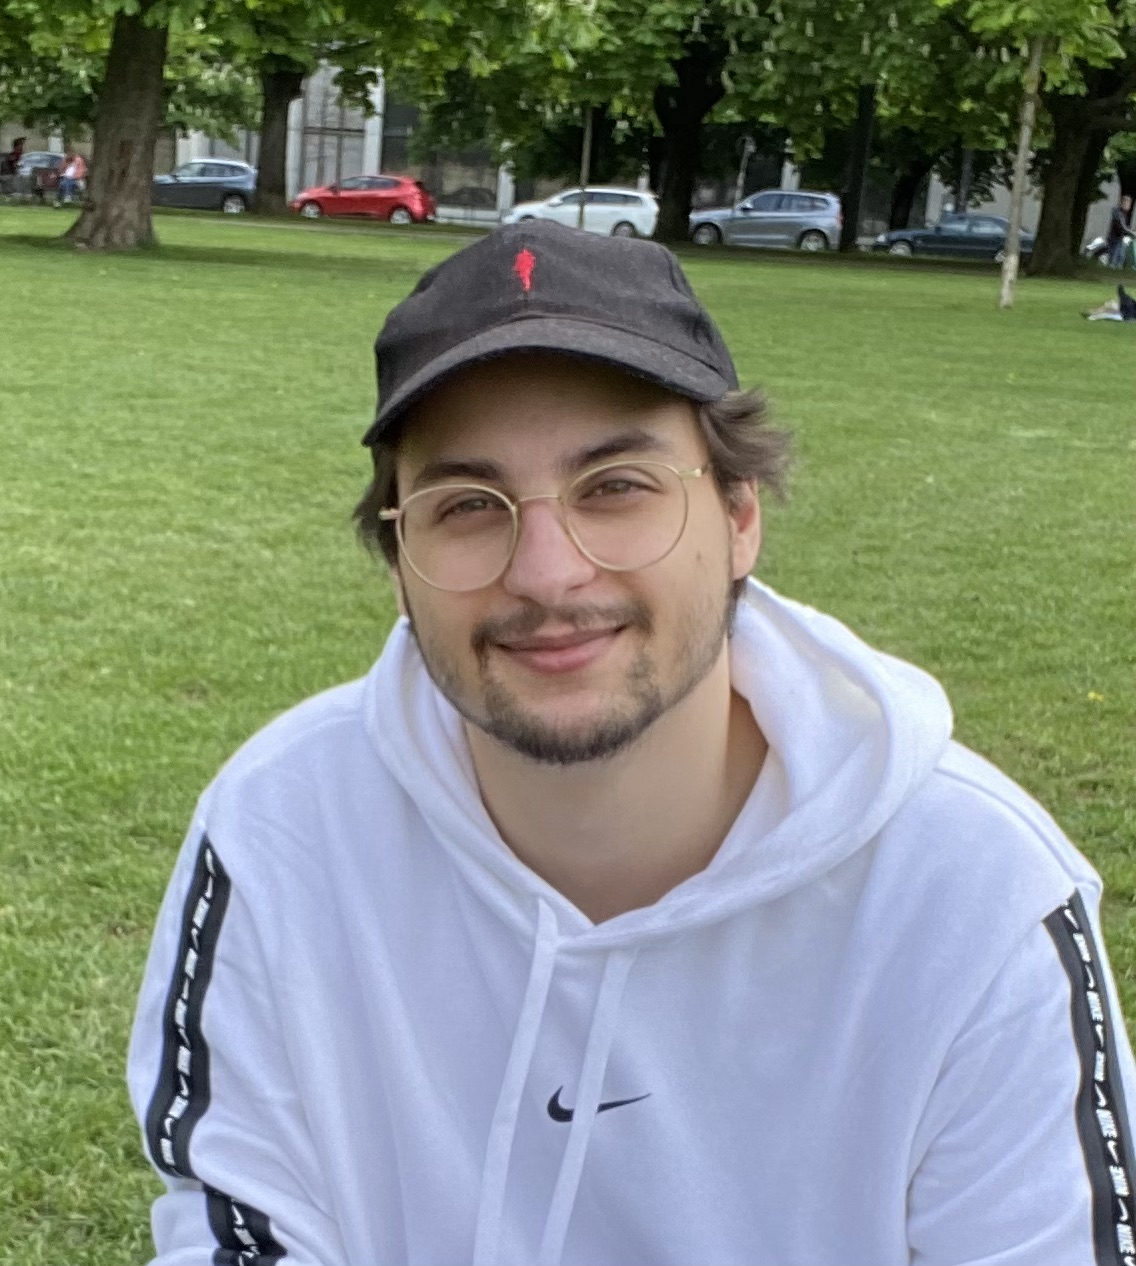

In [ ]:
# Display original test1 image from Google Drive and plot it 
from IPython.display import Image, display
display(Image(filename='/content/drive/My Drive/IUI/Drunkometer/testpic1normal.jpeg', 
      #width=200,
      height=200, 
      ))

In [ ]:
# Pass the image to the preprocesse function 
# Pass the preprocessed image to the MobileNet model by calling model.predict()
# Give the prediciton to the imagenet_utils.decode_predictions() function which decodes the top 5 predictions that the MoboileNet model gives us
preprocessed_image = prepare_image('testpic1normal.jpeg')
predictions = imagemodel.predict(preprocessed_image)
predictions

#Decode ImageNet predictions https://www.tensorflow.org/api_docs/python/tf/keras/applications/imagenet_utils/decode_predictions 
#predictions = mobile.predict(preprocessed_image)
#results = imagenet_utils.decode_predictions(predictions)
#results

1/1 [==============================] - 0s 90ms/step


array([[0., 1.]], dtype=float32)

In [ ]:
type(predictions)

numpy.ndarray

In [ ]:
#The error message "TypeError: Object of type float32 is not JSON serializable" occurs 
#because the jsonify() function in Flask is unable to convert a numpy.float32 to a JSON object. 
#The jsonify function is only able to handle basic data types such as strings, lists, and dictionaries, 
#and it is not able to handle numpy types.

#One solution to this problem is to convert the numpy.float32 to a regular Python float, 
#and then use the json.dumps() method from the json library to convert the data to a JSON object.

import json
from flask import Flask, Response
import numpy as np

app = Flask(__name__)

@app.route('/send_float')
def send_float():
    float_value = np.float32(3.14)
    python_float = float(float_value)
    json_data = json.dumps(python_float)
    headers = {'Content-Type': 'application/json'}
    return Response(json_data, headers=headers)

if __name__ == '__main__':
    app.run(debug=True)

#Alternatively, you can use the built-in float() function to cast the numpy float32 variable to a Python float.
import json
from flask import Flask, Response
import numpy as np

app = Flask(__name__)

@app.route('/send_float')
def send_float():


In [ ]:
#index drunk score on nested numpy array 
print(predictions[0,0])

0.0


In [ ]:
# Results here mean 43.5% chance of being normal and 56.4% chance of being drunk which is not correct here...

In [ ]:
# Display preprocessed test1 image from Google Drive and plot it 
#from IPython.display import Image, display
#display(Image(preprocessed_image))

#test_imgs, test_labels = next(test_batches)
#plotImages(test_imgs)
#print(test_labels)

plotImages(preprocessed_image)

In [ ]:
# Display original test2 image from Google Drive and plot it 
from IPython.display import Image, display
display(Image(filename='/content/drive/My Drive/IUI/Drunkometer/testpic2drunk.png', 
      width=200,
      #height=200, 
      ))

In [ ]:
#Predictions for pic 2 
preprocessed_image = prepare_image('testpic2drunk.png')
newpredictions = imagemodel.predict(preprocessed_image)
newpredictions
print(newpredictions[0,1])
print(type(newpredictions[0,1]))

1/1 [==============================] - 0s 62ms/step
0.9999995
<class 'numpy.float32'>


In [ ]:
print("%.2f" % np.float32(newpredictions[0,1]))

1.00


In [ ]:
#print rounded numpy.float32
print(np.format_float_scientific(newpredictions[0,1], precision=5, unique=False, trim='.', sign=False, pad_left=1, exp_digits=None, min_digits=2))

1.e+00


In [ ]:
#convert rounded numpy.float32 to string 


In [ ]:
#Predictions for pic 2 
preprocessed_image = prepare_image('testpic2drunk.png')
newpredictions = imagemodel.predict(preprocessed_image)
newpredictions
#turn number into float
tbrounded = float(newpredictions[0,0])
print(tbrounded)
#round float to two decimal places 
roundedprediction = round(tbrounded, 4)
print(roundedprediction)

1/1 [==============================] - 0s 99ms/step
4.767784673731512e-07


In [ ]:
roundednumber = round(3.14158798793, 3)
print(roundednumber)

3.142


In [ ]:
type(tbrounded)

float

4.767784673731512e-07


0.0


In [ ]:
# Display original test3 image from Google Drive and plot it 
from IPython.display import Image, display
display(Image(filename='/content/drive/My Drive/IUI/Drunkometer/testpic3drunk.png', 
      #width=200,
      height=200, 
      ))

In [ ]:
#Predictions for pic 3
preprocessed_image = prepare_image('testpic3drunk.png')
predictions = imagemodel.predict(preprocessed_image)
predictions

1/1 [==============================] - 0s 42ms/step


array([[1., 0.]], dtype=float32)

###**WIP Data Augmentation for image generation**

In [ ]:
# Data augmentation for images: Flipping, rotating, changing color 
# Access to more data 
# Avoiding overfitting of the model if dataset is too small 
# Grow the training set adding augmented data

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
gen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, 
    channel_shift_range=10., horizontal_flip=True)

In [ ]:
chosen_image = random.choice(os.listdir('data/dogs-vs-cats/train/dog'))


In [ ]:
image_path = 'data/dogs-vs-cats/train/dog/' + chosen_image

In [ ]:
image = np.expand_dims(plt.imread(image_path),0)

In [ ]:
plt.imshow(image[0])

In [ ]:
# Generate batches of augmented images from the original image
aug_iter = gen.flow(image)

In [ ]:
# Get ten samples of the augmented images
aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]

In [ ]:
plotImages(aug_images)

In [ ]:
# Save augmented data
# We can also use ImageDataGenerator.flow_from_directory() instead of ImageDataGenerator.flow() 
# if we want to generate batches of augmented data from data saved to an organized directory structure on disk
aug_iter = gen.flow(image, save_to_dir='data/dogs-vs-cats/train/dog', save_prefix='aug-image-', save_format='jpeg')
